# **PUC Minas**

# **Pós Graduação em Ciência de Dados e Big Data**


**Trabalho de conclusão de curso**


**Título:** MÉTODOS DE PREDIÇÃO DE PÚBLICO APLICADOS A FILMES BRASILEIROS QUE TIVERAM RENÚNCIA FISCAL.

**Aluno:** Giovana Freitas

# Importação das bibliotecas básicas

In [1]:
!pip -q install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 43.2 MB/s eta 0:00:00


In [2]:
import pandas as pd  ##fornece ferramentas para análise e manipulação de dados (Dados tabulares, Dados ordenados de modo temporal ou não, matrizes, famosas Series e DataFrames, etc)
import numpy as np  ##processamento de grandes, multi-dimensionais arranjos e matrizes, juntamente com uma grande coleção de funções matemáticas de alto nível para operar sobre estas matrizes
import seaborn as sns ##fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos
import matplotlib.pyplot as plt ##Matplotlib apresenta uma API orientada a objetos que permite a criação de gráficos em 2D de uma forma simples e com poucos comandos.
import plotly.express as px ##contém funções que podem criar figuras inteiras de uma só vez
from scipy import stats ##sua biblioteca central é NumPy, package contendo um grande número de distribuições de probabilidade, bem como uma biblioteca crescente de funções estatísticas
from sklearn.model_selection import train_test_split ##utilitário para dividir arrays ou matrizes em subconjuntos aleatórios de treinamento e teste.
from sklearn.linear_model import LinearRegression, Ridge ##Linear regression utilitário para Regressão linear de mínimos quadrados ordinários; Ridge - Mínimos quadrados lineares com regularização l2.
from sklearn.ensemble import RandomForestRegressor ##utilitário para algoritmo RandomForestRegressor (ajustar uma série de árvores de decisão de classificação em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo)
from sklearn.metrics import mean_absolute_error ##utilitário para cáculo de erro médio absoluto
from sklearn.metrics import mean_squared_error ##utilitário para cálculo do erro quadrático médio
from sklearn.neighbors import KNeighborsRegressor ##utilitário para algoritmo KNeighborsRegressor (Regressão baseada em k vizinhos mais próximos)
import random ## módulo que faz parte da linguagem Python e é utilizado para gerar números pseudo-aleatórios
import math ##módulo fornece acesso às funções matemáticas definidas pelo padrão C
import xgboost as xgb ##biblioteca de código aberto que fornece uma implementação eficiente e eficaz do algoritmo de aumento de gradiente
from sklearn.model_selection import cross_val_score, KFold ##utilitário para avaliar uma pontuação por validação cruzada; utilitário que fornece índices de treinamento/teste para dividir dados em conjuntos de treinamento/teste
import sklearn ##biblioteca de aprendizado de máquina de código aberto para a linguagem de programação Python
from sklearn.preprocessing import StandardScaler ## Padronize os atributos removendo a média e dimensionando para a variação da unidade
from sklearn.pipeline import Pipeline ##Pipeline de transformações com um estimador final

# 1 - Coleta de dados
Inicialmente vamos carregar o dataset ProjetosRenunciaFiscal.csv com os projetos de filmes que tiveram renúncia fiscal.

O Link original do dataset é:https://dados.gov.br/dados/conjuntos-dados/projetos-com-renuncia-fiscal

Em seguida, carregaremos os datasets de listagem de filmes brasileiros lançados entre 1995 a 2021 (listagem-de-filmes-brasileiros-lancados-1995-a-2021.csv) e o de obras não publicitária brasileiras com fomento indireto ( ObrasNaoPublicitariasBrasileirasComFomentoIndireto.csv). Este último que contém o CPB (Certificado de Produto Brasileiro) e o número SALIC (Sistema de Apoio às Leis de Incentivo à Cultura) que relacionarão os datasets. Link dos datasets constam em https://www.gov.br/ancine/pt-br/oca/cinema-, e https://dados.gov.br/dados/conjuntos-dados/obras-nao-publicitarias-brasileiras-com-fomento-indireto-aprovado-na-ancine.
Os datasets foram copiados para o GitHub em outubro de 2022.


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

## Exploração dos dados

###ProjetosRenunciaFiscal.csv

In [4]:
#df_RenunciaFiscal = pd.read_csv('/content/ProjetosRenunciaFiscal.csv', sep=';',  encoding="ISO-8859-1")
#df_RenunciaFiscal = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TCC_PUC/DataSet/ProjetosRenunciaFiscal.csv', sep=';',  encoding="ISO-8859-1")
df_RenunciaFiscal = pd.read_csv('https://raw.githubusercontent.com/GioMedeiros/TCC_PUC/main/ProjetosRenunciaFiscal.csv', sep=';',encoding="ISO-8859-1")

In [5]:
df_RenunciaFiscal 

,SALIC,TITULO_PROJETO,MUNICIPIO_PROPONENTE,UF_PROPONENTE,SITUACAO_REGISTRO,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,LEI_8313,ART1,ART1A,ART3,ART3A,ART39,FUNCINES,TOTAL_CAPTADO,DT_APROVACAO_CAPTACAO,DT_1_LIBERACAO
0,04-0353,O DIA EM QUE O BRASIL ESTEVE AQUI,SÃO PAULO,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,"190000,0","440000,0","0,0","0,0","0,0","0,0","0,0","630000,0",23/03/2005,15/12/2006
1,06-0305,A Hora e a Vez de Augusto Matraga,SÃO PAULO,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,"0,0","2604045,0","970000,0","0,0","0,0","0,0","0,0","3574045,0",25/05/2007,16/07/2009
2,06-0412,Estação Liberdade,SÃO PAULO,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,"0,0","310251,0","1000000,0","0,0","0,0","0,0","0,0","1310251,0",07/03/2007,29/12/2010
3,07-0251,Rio Breaks - Uma Estória de Surfe e Sobrevivên...,SÃO PAULO,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,"162500,0","0,0","0,0","0,0","0,0","0,0","0,0","162500,0",14/12/2007,15/05/2009
4,07-0517,O Guia (ex-Cozinha Punk),SÃO PAULO,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,"0,0","0,0","0,0","0,0","0,0","704999,78","0,0","704999,78",13/03/2008,29/10/2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,00-0333,Tainá Uma Aventura na Amazônia - Distribuição,SÃO PAULO,SP,DEFERIDO,96.274.915/0001-64,TIETÊ PRODUÇÕES CINEMATOGRÁFICAS LTDA,"0,0","1330434,0","0,0","859632,64","0,0","0,0","0,0","2190066,64",26/09/2000,15/02/2001
2729,01-3660,Tainá 2 - Aventura Continua (A),SÃO PAULO,SP,DEFERIDO,96.274.915/0001-64,TIETÊ PRODUÇÕES CINEMATOGRÁFICAS LTDA,"1737500,0","3000000,0","0,0","1800000,0","0,0","0,0","0,0","6537500,0",29/10/2001,20/02/2003
2730,07-0295,A Margem da Linha,SÃO PAULO,SP,DEFERIDO,96.496.633/0001-01,CINERAMA FILMES-CF EIRELI,"260000,0","0,0","0,0","0,0","0,0","0,0","0,0","260000,0",05/09/2007,10/12/2010
2731,13-0522,Economia Brasileira - A História Contada por Q...,SÃO PAULO,SP,DEFERIDO,97.533.170/0001-73,CULTURA MAIOR COMUNICACAO E CULTURA LTDA. - ME,"0,0","0,0","1340000,0","0,0","0,0","0,0","0,0","1340000,0",24/12/2013,15/09/2014


####Informações do dataframe 

In [6]:
df_RenunciaFiscal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2733 entries, 0 to 2732
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SALIC                    2733 non-null   object
 1   TITULO_PROJETO           2733 non-null   object
 2   MUNICIPIO_PROPONENTE     2733 non-null   object
 3   UF_PROPONENTE            2733 non-null   object
 4   SITUACAO_REGISTRO        2733 non-null   object
 5   CNPJ_PROPONENTE          2733 non-null   object
 6   RAZAO_SOCIAL_PROPONENTE  2733 non-null   object
 7   LEI_8313                 2733 non-null   object
 8   ART1                     2733 non-null   object
 9   ART1A                    2733 non-null   object
 10  ART3                     2733 non-null   object
 11  ART3A                    2733 non-null   object
 12  ART39                    2733 non-null   object
 13  FUNCINES                 2733 non-null   object
 14  TOTAL_CAPTADO            2733 non-null  

###listagem-de-filmes-brasileiros-lancados-1995-a-2021.csv

In [7]:
#df_FilmesBRLancados = pd.read_csv('/content/listagem-de-filmes-brasileiros-lancados-1995-a-2021.csv', sep=';',header=1,  encoding='utf-8')
#df_FilmesBRLancados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TCC_PUC/DataSet/listagem-de-filmes-brasileiros-lancados-1995-a-2021.csv', sep=';',header=1,  encoding='utf-8')
df_FilmesBRLancados = pd.read_csv('https://raw.githubusercontent.com/GioMedeiros/TCC_PUC/main/listagem-de-filmes-brasileiros-lancados-1995-a-2021.csv', sep=';',header=1,  encoding='utf-8')

In [8]:
df_FilmesBRLancados

,Ano de Lançamento,CPB,Título,Direção,Gênero,Empresa Produtora Brasileira Majoritária,UF,Empresa Produtora Minoritária Brasileira,UF2,Distribuidora,Máximo de Salas,Público,Renda (R$)
0,1995,B0400064200000,A Causa Secreta,Sérgio Bianchi,Ficção,Agravo Produções Cinematográficas,SP,-,-,Riofilme,ND,3000,15000
1,1995,B0500310700000,"Carlota Joaquina, Princesa Do Brazil",Carla Camurati,Ficção,Copacabana Filmes E Produções,RJ,-,-,Elimar,33,1286000,6430000
2,1995,B0500264600000,Carmen Miranda - Bananas Is My Business,Helena Solberg,Documentário,Radiante Filmes,RJ,-,-,Riofilme,ND,15470,90000
3,1995,-,Cinema De Lágrimas,Nelson Pereira Dos Santos,Ficção,Meta Vídeo Produções,RJ,-,-,Riofilme,ND,1575,7500
4,1995,B0300012900000,Efeito Ilha,Luiz Alberto Pereira,Ficção,Lapfilme,SP,-,-,Riofilme,ND,3000,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,2021,B2100339400000,Virando A Mesa,Caio Nogueira Cobra Varajao,Ficção,Media Bridge Produções Ltda / Paris Produções ...,RJ/SP,C. N. Cobra Producoes Artisticas Ltda,-,Paris,6,37,"542,06"
2091,2021,B2100281200000,Você Não É Um Soldado,"Maria Carolina Telles, Aleksei Wrobel Abib",Documentário,Elo Audiovisual Serviços Ltda,SP,Mstk Produções Cinematográficas Ltda-Me / Snac...,SP/SP,Elo Company,1,24,52
2092,2021,B2100259600000,Wandering Heart,Leonardo Esteban Brzezicki Conde,Ficção,Camisa Treze Cultural Ltda,SP,-,-,Elo Company,1,20,"399,8"
2093,2021,B2000059800000,Wild - Rede Selvagem,"Julio Boucada Mauro Inacio Peixoto, Dener Jose...",Documentário,Dg Consultoria E Comunicação Ambiental Ltda,DF,Globo Comunicação E Participações S/A,RJ,Bretz Filmes,2,16,"276,32"


####Informações do dataframe

In [9]:
df_FilmesBRLancados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Ano de Lançamento                         2095 non-null   int64 
 1   CPB                                       2095 non-null   object
 2   Título                                    2095 non-null   object
 3   Direção                                   2095 non-null   object
 4   Gênero                                    2095 non-null   object
 5   Empresa Produtora Brasileira Majoritária  2095 non-null   object
 6   UF                                        2095 non-null   object
 7   Empresa Produtora Minoritária Brasileira  2095 non-null   object
 8   UF2                                       2089 non-null   object
 9   Distribuidora                             2095 non-null   object
 10  Máximo de Salas                           2095 n

###ObrasNaoPublicitariasBrasileirasComFomentoIndireto.csv

In [10]:
#df_ObraNaoPubBraFomInd = pd.read_csv('/content/ObrasNaoPublicitariasBrasileirasComFomentoIndireto.csv', sep=';',  encoding='ISO-8859-1')

#df_ObraNaoPubBraFomInd = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TCC_PUC/DataSet/ObrasNaoPublicitariasBrasileirasComFomentoIndireto.csv', sep=';',  encoding='ISO-8859-1')
df_ObraNaoPubBraFomInd = pd.read_csv('https://raw.githubusercontent.com/GioMedeiros/TCC_PUC/main/ObrasNaoPublicitariasBrasileirasComFomentoIndireto.csv', sep=';',  encoding='ISO-8859-1')

In [11]:
df_ObraNaoPubBraFomInd

,CPB,TITULO_ORIGINAL,NUMERO_SALIC
0,B0200000400000,SEJA O QUE DEUS QUISER ...,327
1,B0200000400000,SEJA O QUE DEUS QUISER ...,23734
2,B0200001000000,DURVAL DISCOS ...,973937
3,B0200001200000,RUA SEIS SEM NUMERO ...,374
4,B0200001300000,DESMUNDO ...,984739
...,...,...,...
2313,B2200178200000,"PIRANGA, O HERÓI TACITURNO ...",170720
2314,B2200184200000,DISSONANTES ...,170108
2315,B2200185400000,PAGANDO CARO - O DIÁRIO DE UMA CRISE ANUNCIADA...,70130
2316,B2200186400000,OXIGÊNIO ...,130465


####Informações do dataframe

In [12]:
df_ObraNaoPubBraFomInd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CPB              2318 non-null   object
 1   TITULO_ORIGINAL  2318 non-null   object
 2   NUMERO_SALIC     2318 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 54.5+ KB


# 2 - Tratamento de Dados

Nesta etapa iremos fazer a limpeza e o tratamento de dados, além da junção entre os datasets.



##Dataframe df_RenunciaFiscal

###Verificação dos valores nulos no dataframe df_RenunciaFiscal

In [13]:
df_RenunciaFiscal.isnull().sum()

SALIC                      0
TITULO_PROJETO             0
MUNICIPIO_PROPONENTE       0
UF_PROPONENTE              0
SITUACAO_REGISTRO          0
CNPJ_PROPONENTE            0
RAZAO_SOCIAL_PROPONENTE    0
LEI_8313                   0
ART1                       0
ART1A                      0
ART3                       0
ART3A                      0
ART39                      0
FUNCINES                   0
TOTAL_CAPTADO              0
DT_APROVACAO_CAPTACAO      0
DT_1_LIBERACAO             0
dtype: int64

###Avalia valores duplicados

In [14]:
df_RenunciaFiscal.duplicated().sum()

0

##Dataframe df_ObraNaoPubBraFomInd

####Verificação dos valores nulos no dataframe  df_NaoPubBraFomInd

In [15]:
df_ObraNaoPubBraFomInd.isnull().sum()

CPB                0
TITULO_ORIGINAL    0
NUMERO_SALIC       0
dtype: int64

In [16]:
df_ObraNaoPubBraFomInd.duplicated().sum()

0

##Dataframe df_FilmesBRLancados

###Verificação dos valores nulos no dataframe  df_FilmesBRLancados

In [17]:
df_FilmesBRLancados.isnull().sum()

Ano de Lançamento                           0
CPB                                         0
Título                                      0
Direção                                     0
Gênero                                      0
Empresa Produtora Brasileira Majoritária    0
UF                                          0
Empresa Produtora Minoritária Brasileira    0
UF2                                         6
Distribuidora                               0
Máximo de Salas                             0
Público                                     0
Renda (R$)                                  0
dtype: int64

In [18]:
df_FilmesBRLancados.duplicated().sum()

0

## 2.1 - Unindo os dados dos datasets e formatando colunas

###Retirando espaços de CPB

In [19]:
df_FilmesBRLancados['CPB'] = df_FilmesBRLancados['CPB'].str.strip()
df_ObraNaoPubBraFomInd['CPB'] = df_ObraNaoPubBraFomInd['CPB'].str.strip()

###Formatando SALIC dos datasets para possibilitar a junção

In [20]:
df_RenunciaFiscal['SALIC']=df_RenunciaFiscal['SALIC'].str.replace('[-]','')

<ipython-input-20-e9c4609f45c8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_RenunciaFiscal['SALIC']=df_RenunciaFiscal['SALIC'].str.replace('[-]','')


In [21]:
df_ObraNaoPubBraFomInd['NUMERO_SALIC']=df_ObraNaoPubBraFomInd['NUMERO_SALIC'].astype(str)
df_ObraNaoPubBraFomInd['NUMERO_SALIC']=df_ObraNaoPubBraFomInd['NUMERO_SALIC'].str.zfill(6)
df_ObraNaoPubBraFomInd.rename(columns = {'NUMERO_SALIC':'SALIC'}, inplace = True)

###Formatando tipo de dados e unindo datasets

In [22]:
df_RenunciaFiscal['TOTAL_CAPTADO']=df_RenunciaFiscal['TOTAL_CAPTADO'].apply(lambda x:str(x).replace(",","."))
df_RenunciaFiscal['TOTAL_CAPTADO'].astype('float64')

0        630000.00
1       3574045.00
2       1310251.00
3        162500.00
4        704999.78
           ...    
2728    2190066.64
2729    6537500.00
2730     260000.00
2731    1340000.00
2732     250000.00
Name: TOTAL_CAPTADO, Length: 2733, dtype: float64

In [23]:
df_FilmesBRLancados['Renda (R$)']=df_FilmesBRLancados['Renda (R$)'].apply(lambda x:str(x).replace(",","."))

In [24]:
df_merge = pd.merge(pd.merge(df_RenunciaFiscal,df_ObraNaoPubBraFomInd, how = 'inner',on='SALIC'),df_FilmesBRLancados, how = 'inner',on='CPB')

In [25]:
df_merge.head(10)

,SALIC,TITULO_PROJETO,MUNICIPIO_PROPONENTE,UF_PROPONENTE,SITUACAO_REGISTRO,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,LEI_8313,ART1,ART1A,...,Direção,Gênero,Empresa Produtora Brasileira Majoritária,UF,Empresa Produtora Minoritária Brasileira,UF2,Distribuidora,Máximo de Salas,Público,Renda (R$)
0,040353,O DIA EM QUE O BRASIL ESTEVE AQUI,SÃO PAULO,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,"190000,0","440000,0","0,0",...,Caito Ortiz,Documentário,Prodigo Films,SP,-,-,Pródigo,6,778,5300
1,060305,A Hora e a Vez de Augusto Matraga,SÃO PAULO,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,"0,0","2604045,0","970000,0",...,Vinícius Coimbra,Ficção,Prodigo Films,SP,-,-,Nossa Distribuidora,15,2499,34440.19
2,060412,Estação Liberdade,SÃO PAULO,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,"0,0","310251,0","1000000,0",...,Caito Ortiz,Ficção,Prodigo Films,SP,-,-,Elo Company,2,564,8461.29
3,100310,O Roubo da Taça (Ex-O Inacreditável Roubo da J...,SÃO PAULO,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,"0,0","1500100,0","800000,0",...,Caito Ortiz,Ficção,Prodigo Films,SP,-,-,Downtown/Paris,192,30209,397360.64
4,160386,Humberto Mauro,RIO DE JANEIRO,RJ,DEFERIDO,00.061.412/0001-31,DI MAURO CULTURA E ARTE PRODUCOES ARTISTICAS E...,"0,0","0,0","280000,0",...,André Di Mauro,Documentário,Dimauro Filmes,RJ,Canal Brasil,RJ,Dimauro Filmes,4,280,3270.53
5,960673,Condenado à Liberdade,RIO DE JANEIRO,RJ,DEFERIDO,00.101.698/0001-31,YPEARTS AUDIOVISUAL EIRELI - ME,"0,0","1929507,33","0,0",...,Emiliano Ribeiro,Ficção,Ipê Artes,RJ,-,-,Uip,38,15262,77169
6,070210,Pìxinguinha - Um Homem Carinhoso,RIO DE JANEIRO,RJ,DEFERIDO,00.101.698/0001-31,YPEARTS AUDIOVISUAL EIRELI - ME,"0,0","2006615,0","471893,88",...,Denise Nunes Saraceni,Ficção,Ypearts Audiovisual Eireli - Me,RJ,Canal Brazil S/A / Globo Comunicação E Partici...,RJ/RJ,Downtown,85,5527,107104.39
7,050245,POR TRÁS DO VÉU,RIO DE JANEIRO,RJ,DEFERIDO,00.101.698/0001-31,YPEARTS AUDIOVISUAL EIRELI - ME,"230000,0","875000,0","64618,44",...,Emiliano Ribeiro,Documentário,Ipê Artes,RJ,-,-,Downtown,1,15,232
8,000359,Gatão de Meia Idade,RIO DE JANEIRO,RJ,DEFERIDO,00.101.698/0001-31,YPEARTS AUDIOVISUAL EIRELI - ME,"201839,63","2890681,0","0,0",...,Antonio Carlos Da Fontoura,Ficção,Ipê Artes,RJ,-,-,Downtown,38,81947,751249
9,080630,Pequeno Segredo,SÃO PAULO,SP,DEFERIDO,00.132.102/0001-60,SCHÜRMANN PRODUÇÕES CINEMATOGRÁFICAS LTDA,"0,0","0,0","4000000,0",...,David Schurman,Ficção,Schurmann Filmes,SP,Ocean Films/Instituto Kat Schurmann,SC/SC,Diamond Films,259,187055,2801967.64


###Filtrando apenas os registros com total captado de renúncia maior que zero e com Público diferente de 'ND' (Não disponível).

In [26]:
df_merge = df_merge.loc[(df_merge['TOTAL_CAPTADO'].astype('float64') >0) & (df_merge['Público'] != 'ND')]

In [27]:
df_merge['TOTAL_CAPTADO']=df_merge['TOTAL_CAPTADO'].astype('float64')
df_merge['Renda (R$)']=df_merge['Renda (R$)'].astype('float64')
df_merge['Público']=df_merge['Público'].astype('int')

df_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 1056
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   SALIC                                     1051 non-null   object 
 1   TITULO_PROJETO                            1051 non-null   object 
 2   MUNICIPIO_PROPONENTE                      1051 non-null   object 
 3   UF_PROPONENTE                             1051 non-null   object 
 4   SITUACAO_REGISTRO                         1051 non-null   object 
 5   CNPJ_PROPONENTE                           1051 non-null   object 
 6   RAZAO_SOCIAL_PROPONENTE                   1051 non-null   object 
 7   LEI_8313                                  1051 non-null   object 
 8   ART1                                      1051 non-null   object 
 9   ART1A                                     1051 non-null   object 
 10  ART3                                

###Filtrando apenas as colunas de interesse 

In [28]:
df_merge=df_merge[['TOTAL_CAPTADO','Ano de Lançamento','CPB','Título','Direção','Gênero','Distribuidora','Público','Máximo de Salas','Renda (R$)']]

In [29]:
df_merge.head(10)

,TOTAL_CAPTADO,Ano de Lançamento,CPB,Título,Direção,Gênero,Distribuidora,Público,Máximo de Salas,Renda (R$)
0,630000.00,2006,B0600496100000,O Dia Em Que O Brasil Esteve Aqui,Caito Ortiz,Documentário,Pródigo,778,6,5300.00
1,3574045.00,2015,B1201643000000,A Hora E A Vez De Augusto Matraga,Vinícius Coimbra,Ficção,Nossa Distribuidora,2499,15,34440.19
2,1310251.00,2014,B1301763500000,Estação Liberdade,Caito Ortiz,Ficção,Elo Company,564,2,8461.29
3,2300100.00,2016,B1600408200000,O Roubo Da Taça,Caito Ortiz,Ficção,Downtown/Paris,30209,192,397360.64
4,280000.00,2019,B1800474200000,Humberto Mauro,André Di Mauro,Documentário,Dimauro Filmes,280,4,3270.53
5,1929507.33,2001,B0500312000000,Condenado À Liberdade,Emiliano Ribeiro,Ficção,Uip,15262,38,77169.00
6,5478508.88,2021,B1900508000000,"Pixinguinha, Um Homem Carinhoso",Denise Nunes Saraceni,Ficção,Downtown,5527,85,107104.39
7,1169618.44,2013,B1301936500000,Por Trás Do Véu,Emiliano Ribeiro,Documentário,Downtown,15,1,232.00
8,3636270.63,2006,B0600467100000,Gatão De Meia Idade,Antonio Carlos Da Fontoura,Ficção,Downtown,81947,38,751249.00
9,4000000.00,2016,B1600530200000,Pequeno Segredo,David Schurman,Ficção,Diamond Films,187055,259,2801967.64


In [30]:
df_merge[df_merge['CPB']=='B1900019900000']

,TOTAL_CAPTADO,Ano de Lançamento,CPB,Título,Direção,Gênero,Distribuidora,Público,Máximo de Salas,Renda (R$)
873,3152565.72,2019,B1900019900000,O Galã,Francisco Ramalho Jr.,Ficção,H2O Films,2128,26,33887.0
874,216315.00,2019,B1900019900000,O Galã,Francisco Ramalho Jr.,Ficção,H2O Films,2128,26,33887.0


###Realizando soma do total captado de renúncia fiscal agrupando por filme.

In [31]:
df_merge_group = df_merge.groupby(['Ano de Lançamento','CPB','Título','Direção','Gênero','Distribuidora','Público','Máximo de Salas','Renda (R$)'])['TOTAL_CAPTADO'].agg('sum').reset_index()

In [32]:
df_merge_group[df_merge_group['CPB']=='B1900019900000']

,Ano de Lançamento,CPB,Título,Direção,Gênero,Distribuidora,Público,Máximo de Salas,Renda (R$),TOTAL_CAPTADO
918,2019,B1900019900000,O Galã,Francisco Ramalho Jr.,Ficção,H2O Films,2128,26,33887.0,3368880.72


###Verificando coluna "Máximo de Salas" com valor 'ND'

In [33]:
df_merge_group[df_merge_group['Máximo de Salas']=='ND']

,Ano de Lançamento,CPB,Título,Direção,Gênero,Distribuidora,Público,Máximo de Salas,Renda (R$),TOTAL_CAPTADO
0,1996,B0500298800000,Jenipapo,Monique Gardenberg,Ficção,Riofilme,72133,ND,350000.0,7.459792e+05
1,1996,B0600547500000,O Cego Que Gritava Luz,João Batista De Andrade,Ficção,Riofilme,1647,ND,8500.0,3.581006e+05
13,1998,B0600556000000,"Boleiros, Era Uma Vez O Futebol",Ugo Giorgetti,Ficção,Tabu Arte,60000,ND,300000.0,1.398822e+06
17,1999,B0600450400000,O Tronco,João Batista De Andrade,Ficção,Pandora,1000,ND,5000.0,2.488754e+06
21,1999,B0800819200000,Os Carvoeiros,Nigel Noble,Documentário,Zazen,1000,ND,5000.0,9.432510e+05
56,2003,B0300002500000,"Zico, O Filme",Elizeu Ewald,Documentário,Diler Prod.,1000,ND,5000.0,1.296500e+06
191,2007,B0600628200000,Encontro Com Milton Santos Ou: O Mundo Global ...,Silvio Tendler,Documentário,Caliban,15932,ND,118017.0,4.492920e+05


###Preenchendo com a média de salas para valores do campo "Máximo de Salas" igual a 'ND'

In [34]:
df_merge_group['Máximo de Salas1'] = df_merge_group.loc[(df_merge_group['Máximo de Salas'] != 'ND'), 'Máximo de Salas']#
x = df_merge_group['Máximo de Salas1'].astype(float)
x.mean().round() 





91.0

In [35]:
df_merge_group.loc[(df_merge_group['Máximo de Salas'] == 'ND'), ['Máximo de Salas']]= 91.0

In [36]:
df_merge_group=df_merge_group.drop('Máximo de Salas1', axis=1)

In [37]:
df_merge_group['Máximo de Salas']=df_merge_group['Máximo de Salas'].astype('int')

In [38]:
df_merge_group[df_merge_group['CPB']=='B0600628200000']

,Ano de Lançamento,CPB,Título,Direção,Gênero,Distribuidora,Público,Máximo de Salas,Renda (R$),TOTAL_CAPTADO
191,2007,B0600628200000,Encontro Com Milton Santos Ou: O Mundo Global ...,Silvio Tendler,Documentário,Caliban,15932,91,118017.0,449292.0


###Criando coluna derivada (Diferença da renda e o total captado de renúncia fiscal) apenas para exploração de dados

In [39]:
df_merge_group.insert(9,"DifRendaRenuncia",df_merge_group['Renda (R$)'] - df_merge_group['TOTAL_CAPTADO'],True)
df_merge_group['Indica_Pos_Neg'] = np.where(df_merge_group['Renda (R$)'] - df_merge_group['TOTAL_CAPTADO'] < 0 , 0,1)
df_merge_group.head(10)


,Ano de Lançamento,CPB,Título,Direção,Gênero,Distribuidora,Público,Máximo de Salas,Renda (R$),DifRendaRenuncia,TOTAL_CAPTADO,Indica_Pos_Neg
0,1996,B0500298800000,Jenipapo,Monique Gardenberg,Ficção,Riofilme,72133,91,350000.0,-3.959792e+05,7.459792e+05,0
1,1996,B0600547500000,O Cego Que Gritava Luz,João Batista De Andrade,Ficção,Riofilme,1647,91,8500.0,-3.496006e+05,3.581006e+05,0
2,1997,B0500311300000,Silvino Santos - O Cineasta Da Selva,Aurélio Michelis,Documentário,Riofilme,4560,2,21386.0,-2.758655e+05,2.972515e+05,0
3,1997,B0500321300000,Lua De Outubro,Henrique De Freitas Lima,Ficção,Paris,33894,17,114351.0,-1.741175e+06,1.855526e+06,0
4,1997,B0600520300000,Anahy De Las Misiones,Sérgio Silva,Ficção,S. Ribeiro,131000,15,492560.0,-1.052946e+06,1.545506e+06,0
5,1997,B0800842700000,O Cangaceiro,Anibal Massaini Neto,Ficção,S. Ribeiro,140932,10,618692.0,-1.966539e+06,2.585231e+06,0
6,1998,B0400052500000,Bocage - O Triunfo Do Amor,Djalma Limongi Batista,Ficção,Riofilme,16621,2,73281.0,-2.415226e+05,3.148036e+05,0
7,1998,B0500242600000,Menino Maluquinho 2 - A Aventura,Fabrízia Alves Pinto/Fernando Meirelles,Ficção,S. Ribeiro/Riofilme,367456,94,898496.0,-3.119285e+06,4.017781e+06,0
8,1998,B0500261200000,Amores,Domingos De Oliveira,Ficção,S. Ribeiro/Riofilme,33192,6,164418.0,-3.390980e+05,5.035160e+05,0
9,1998,B0500272900000,Como Ser Solteiro,Rosane Svartman,Ficção,S. Ribeiro/Riofilme,150778,25,825101.0,3.675838e+05,4.575172e+05,1


###Formatando apresentação de valores 

In [40]:
df_merge_group.style.format({'TOTAL_CAPTADO':'R$ {:0,.2f}'})
df_merge_group.style.format({'Renda (R$)':'{:0,.2f}'})
df_merge_group.style.format({'DifRendaRenuncia':'{:0,.2f}'})
 
#print (
#df_merge_group['Título'] +'***'+
#df_merge_group['TOTAL_CAPTADO'].map("{:_.2f}".format).str.translate(str.maketrans("_.", ".,")) +'***'+
#df_merge_group['Renda (R$)'].map("{:_.2f}".format).str.translate(str.maketrans("_.", ".,")) +' '+'***'+
#df_merge_group['DifRendaRenuncia'].map("{:_.2f}".format).str.translate(str.maketrans("_.", ".,")) ) 

,Ano de Lançamento,CPB,Título,Direção,Gênero,Distribuidora,Público,Máximo de Salas,Renda (R$),DifRendaRenuncia,TOTAL_CAPTADO,Indica_Pos_Neg
0,1996,B0500298800000,Jenipapo,Monique Gardenberg,Ficção,Riofilme,72133,91,350000.000000,"-395,979.20",745979.200000,0
1,1996,B0600547500000,O Cego Que Gritava Luz,João Batista De Andrade,Ficção,Riofilme,1647,91,8500.000000,"-349,600.60",358100.600000,0
2,1997,B0500311300000,Silvino Santos - O Cineasta Da Selva,Aurélio Michelis,Documentário,Riofilme,4560,2,21386.000000,"-275,865.50",297251.500000,0
3,1997,B0500321300000,Lua De Outubro,Henrique De Freitas Lima,Ficção,Paris,33894,17,114351.000000,"-1,741,174.56",1855525.560700,0
4,1997,B0600520300000,Anahy De Las Misiones,Sérgio Silva,Ficção,S. Ribeiro,131000,15,492560.000000,"-1,052,946.00",1545506.000000,0
5,1997,B0800842700000,O Cangaceiro,Anibal Massaini Neto,Ficção,S. Ribeiro,140932,10,618692.000000,"-1,966,539.10",2585231.099700,0
6,1998,B0400052500000,Bocage - O Triunfo Do Amor,Djalma Limongi Batista,Ficção,Riofilme,16621,2,73281.000000,"-241,522.63",314803.630000,0
7,1998,B0500242600000,Menino Maluquinho 2 - A Aventura,Fabrízia Alves Pinto/Fernando Meirelles,Ficção,S. Ribeiro/Riofilme,367456,94,898496.000000,"-3,119,285.43",4017781.429100,0
8,1998,B0500261200000,Amores,Domingos De Oliveira,Ficção,S. Ribeiro/Riofilme,33192,6,164418.000000,"-339,098.00",503516.000000,0
9,1998,B0500272900000,Como Ser Solteiro,Rosane Svartman,Ficção,S. Ribeiro/Riofilme,150778,25,825101.000000,"367,583.76",457517.236200,1


##2.2 Verificação dos valores nulos e total de registros

In [41]:
df_merge_group.isnull().sum()

Ano de Lançamento    0
CPB                  0
Título               0
Direção              0
Gênero               0
Distribuidora        0
Público              0
Máximo de Salas      0
Renda (R$)           0
DifRendaRenuncia     0
TOTAL_CAPTADO        0
Indica_Pos_Neg       0
dtype: int64

In [42]:
df_merge_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ano de Lançamento  1039 non-null   int64  
 1   CPB                1039 non-null   object 
 2   Título             1039 non-null   object 
 3   Direção            1039 non-null   object 
 4   Gênero             1039 non-null   object 
 5   Distribuidora      1039 non-null   object 
 6   Público            1039 non-null   int64  
 7   Máximo de Salas    1039 non-null   int64  
 8   Renda (R$)         1039 non-null   float64
 9   DifRendaRenuncia   1039 non-null   float64
 10  TOTAL_CAPTADO      1039 non-null   float64
 11  Indica_Pos_Neg     1039 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 97.5+ KB


##2.3 - Tratando outliers e valores inválidos.

Com o código abaixo e visualizando o boxplot percebemos que existem outliers. Vamos investigar.

In [43]:
pd.set_option('float_format','{:.3f}'.format)

In [44]:
df_merge_group.describe()

,Ano de Lançamento,Público,Máximo de Salas,Renda (R$),DifRendaRenuncia,TOTAL_CAPTADO,Indica_Pos_Neg
count,1039.000,1039.000,1039.000,1039.000,1039.000,1039.000,1039.000
mean,2012.518,254577.375,91.027,2574339.498,633444.168,1940895.330,0.164
std,5.701,855163.615,161.913,9720508.247,9414776.864,1744883.260,0.370
min,1996.000,3.000,1.000,52.000,-8347242.280,19555.090,0.000
25%,2008.000,1675.000,6.000,17087.570,-1740663.280,515154.705,0.000
50%,2013.000,10458.000,19.000,102038.000,-665577.070,1362070.000,0.000
75%,2017.000,94858.500,100.000,863126.270,-198440.000,3000000.000,0.000
max,2021.000,11146723.000,1815.000,169895668.130,166895668.130,8347469.280,1.000


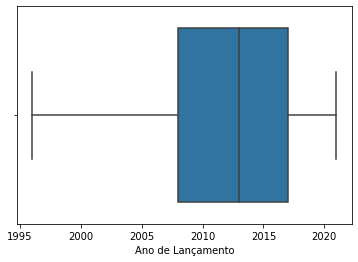

In [45]:
sns.boxplot(x=df_merge_group['Ano de Lançamento'])

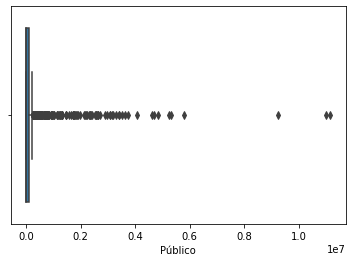

In [46]:
sns.boxplot(x=df_merge_group['Público'])

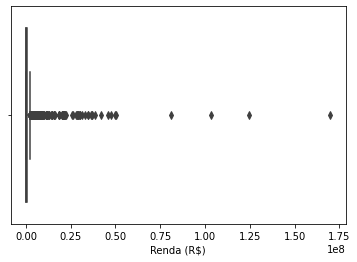

In [47]:
sns.boxplot(x=df_merge_group['Renda (R$)'])

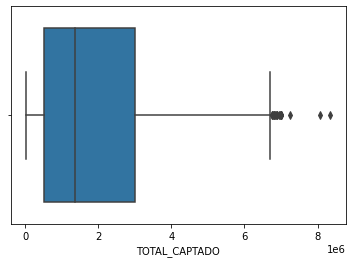

In [48]:
sns.boxplot(x=df_merge_group['TOTAL_CAPTADO'])

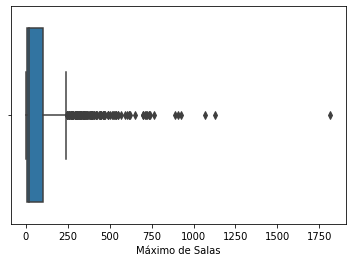

In [49]:
sns.boxplot(x=df_merge_group['Máximo de Salas'])

In [50]:
df_merge_group.loc[(np.abs(stats.zscore(df_merge_group['Público'])) >= 9)]

,Ano de Lançamento,CPB,Título,Direção,Gênero,Distribuidora,Público,Máximo de Salas,Renda (R$),DifRendaRenuncia,TOTAL_CAPTADO,Indica_Pos_Neg
359,2010,B1001296000000,Tropa De Elite 2,José Padilha,Ficção,Zazen,11146723,763,103461153.740,96461153.740,7000000.000,1
730,2016,B1600716500000,Minha Mãe É Uma Peça 2,César Rodrigues,Ficção,Downtown/Paris,9235184,1125,124687721.820,121205721.820,3482000.000,1
947,2019,B1900576900000,Minha Mãe É Uma Peça 3,Susana Garcia,Ficção,Downtown/Paris,10978012,1815,169895668.130,166895668.130,3000000.000,1


In [51]:
df_merge_group.loc[(np.abs(stats.zscore(df_merge_group['Renda (R$)'])) >= 7)]

,Ano de Lançamento,CPB,Título,Direção,Gênero,Distribuidora,Público,Máximo de Salas,Renda (R$),DifRendaRenuncia,TOTAL_CAPTADO,Indica_Pos_Neg
359,2010,B1001296000000,Tropa De Elite 2,José Padilha,Ficção,Zazen,11146723,763,103461153.740,96461153.740,7000000.000,1
730,2016,B1600716500000,Minha Mãe É Uma Peça 2,César Rodrigues,Ficção,Downtown/Paris,9235184,1125,124687721.820,121205721.820,3482000.000,1
877,2018,B1800539000000,Minha Vida Em Marte,Susana Garcia,Ficção,Downtown/Paris,5235609,925,81121551.250,78121551.250,3000000.000,1
947,2019,B1900576900000,Minha Mãe É Uma Peça 3,Susana Garcia,Ficção,Downtown/Paris,10978012,1815,169895668.130,166895668.130,3000000.000,1


In [52]:
df_merge_group.loc[(np.abs(stats.zscore(df_merge_group['Máximo de Salas'])) >= 6)]

,Ano de Lançamento,CPB,Título,Direção,Gênero,Distribuidora,Público,Máximo de Salas,Renda (R$),DifRendaRenuncia,TOTAL_CAPTADO,Indica_Pos_Neg
730,2016,B1600716500000,Minha Mãe É Uma Peça 2,César Rodrigues,Ficção,Downtown/Paris,9235184,1125,124687721.820,121205721.820,3482000.000,1
925,2019,B1900104200000,De Pernas Pro Ar 3,Júlia Rezende,Ficção,Downtown/Paris,1838586,1070,28475029.300,24975029.300,3500000.000,1
947,2019,B1900576900000,Minha Mãe É Uma Peça 3,Susana Garcia,Ficção,Downtown/Paris,10978012,1815,169895668.130,166895668.130,3000000.000,1


###Apesar de existirem alguns pontos cuja a distância nos chama atenção, eles não são erros, mas sim filmes que são considerados fenômenos de bilheteria, como "Tropa de Elite 2", "Minha mãe é uma peça 3", e "Minha mãe é uma peça 2".

# 3 - Análise exploratória

Perguntas que pretende-se responder durante a análise:
- Total de Público por Filme
- Total de Filmes por Distribuidora e Gênero
- Total de público por Distribuidora
- Total de público por Gênero
- Total de público por ano de lançamento de filme
- Quantidade de valores positivos e negativos da diferença entre renda e total captado de renúncia fiscal. 
- Soma de valores da diferença entre renda e total captado de renúncia fiscal, agrupados por valores positivo e negativo.
- Quantidade de Filmes por gênero
- Total de receita e Total captado de renúncia fiscal por ano de lançamento do filme
- Ticket Médio (Renda/Público)

In [53]:
def gera_countplot(alvo, xlabel, ylabel, title):
  ax = sns.countplot(x=df_merge_group[alvo])
  ax.set_title(f'{title}\n'); 
  ax.set_xlabel(xlabel); 
  ax.set_ylabel(ylabel); 
  return ax

##3.1 Total de Público por Filme

In [54]:
df_group_Titulo_Publico = df_merge_group.groupby(['Título'])['Público'].agg('sum').reset_index()
fig1 = px.treemap(df_group_Titulo_Publico, path=['Título'], values="Público")
fig1.show()

##3.2 Total de Filmes por Distribuidora e Gênero


In [55]:
grafico = px.treemap( df_merge_group, path=['Distribuidora','Gênero','CPB'])
grafico.show()


##3.3 Total de Público por Distribuidora

In [56]:
df_group_Districuidora_Publico = df_merge_group.groupby(['Distribuidora'])['Público'].agg('sum').reset_index()
fig1 = px.treemap(df_group_Districuidora_Publico, path=['Distribuidora'], values="Público")
fig1.show()

##3.4 Total de Público por Direção

In [57]:
df_group_Districuidora_Publico = df_merge_group.groupby(['Direção'])['Público'].agg('sum').reset_index()
fig1 = px.treemap(df_group_Districuidora_Publico, path=['Direção'], values="Público")
fig1.show()

##3.5 Total de público por ano de lançamento de filme

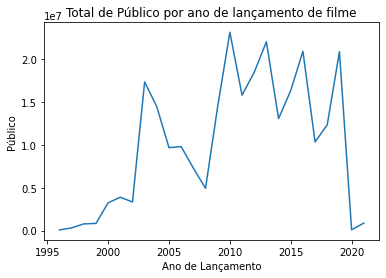

In [58]:
plot_df = df_merge_group.groupby(['Ano de Lançamento']).Público.sum().plot(kind='line')
plot_df.plot()
plot_df.set_title('Total de Público por ano de lançamento de filme');
plot_df.set_ylabel('Público'); 

##3.6 Total de público por Gênero


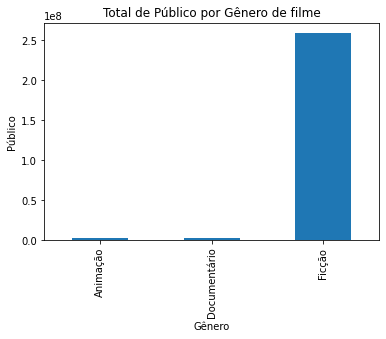

In [59]:
plot_df = df_merge_group.groupby(['Gênero']).Público.sum().plot(kind='bar')
plot_df.plot()
plot_df.set_title('Total de Público por Gênero de filme');
plot_df.set_ylabel('Público'); 

##3.7 Quantidade de valores positivos e negativos da diferença entre renda e total captado de renúncia fiscal. 

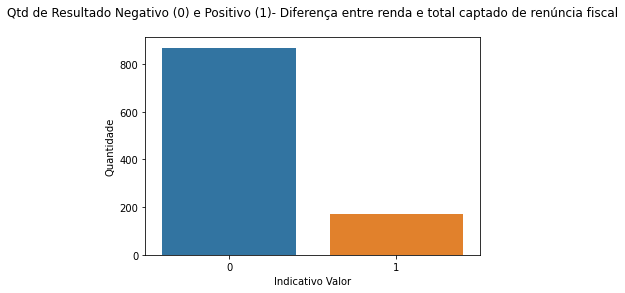

In [60]:
cp_DifPosNeg = gera_countplot('Indica_Pos_Neg', 'Indicativo Valor', 'Quantidade', 'Qtd de Resultado Negativo (0) e Positivo (1)- Diferença entre renda e total captado de renúncia fiscal')
plt.show()

##3.8 Soma de valores da diferença entre renda e total captado de renúncia fiscal, agrupados por valores positivo e negativo.

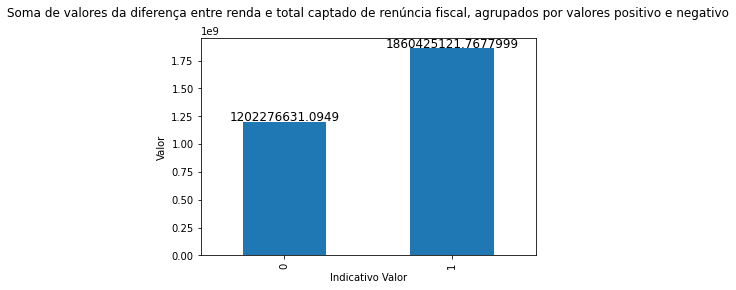

In [61]:

plot_df = df_merge_group.groupby(['Indica_Pos_Neg']).DifRendaRenuncia.sum().abs().plot(kind='bar')
plot_df.plot()
plot_df.set_title('Soma de valores da diferença entre renda e total captado de renúncia fiscal, agrupados por valores positivo e negativo\n')
plt.ylabel("Valor")
plt.xlabel("Indicativo Valor")
for i in plot_df.patches:
 plot_df.annotate(i.get_height(),
              (i.get_x() + i.get_width() / 2, i.get_height()),
              ha='center', va='baseline', fontsize=12,
              color='black', xytext=(0,1),
              textcoords='offset points')
 
 

##3.9 Quantidade de Filmes por gênero

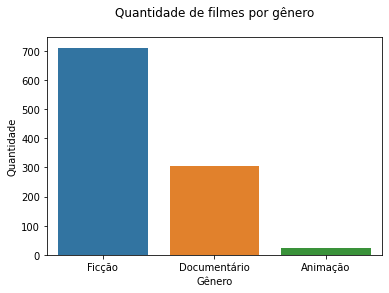

In [62]:
cp_QtdFilesGenero = gera_countplot('Gênero', 'Gênero', 'Quantidade', 'Quantidade de filmes por gênero')

##3.10 Total da Diferença de Renda e Renúncia Fiscal por gênero

[]

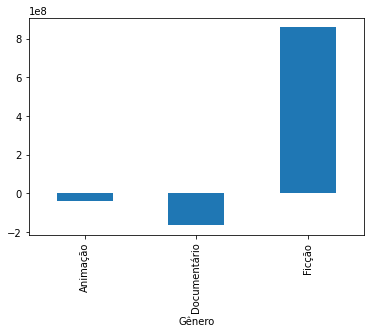

In [63]:
plot_df = df_merge_group.groupby(['Gênero']).DifRendaRenuncia.sum().plot(kind='bar')
plot_df.plot()
#for i in plot_df.patches:
 #plot_df.annotate(i.get_height(),
             # (i.get_x() + i.get_width() / 2, i.get_height()),
              #ha='center', va='baseline', fontsize=12,
              #color='black', xytext=(0,1),
              #textcoords='offset points')

##3.11 Total de receita e Total captado de renúncia fiscal por ano de lançamento do filme

Text(2021, 100000000, '(Total Captado de Renúncia Fiscal)')

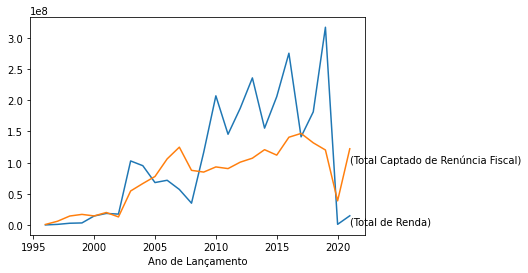

In [64]:
df_merge_group.rename(columns={'Renda (R$)': 'Renda'}, inplace = True)

plot_df = df_merge_group.groupby(['Ano de Lançamento']).Renda.sum().plot(kind='line')
plot_df = df_merge_group.groupby(['Ano de Lançamento']).TOTAL_CAPTADO.sum().plot(kind='line')
plot_df.plot()
plot_df.annotate('(Total de Renda)', color = 'black', xy=(2021, 0.02), xytext=(2021,0.05))
plot_df.annotate('(Total Captado de Renúncia Fiscal)', color = 'black', xy=(2021, 100000000), xytext=(2021,100000000))






##3.12 Ticket Médio (Renda/Público)





In [65]:
df_merge_group['result_renda_div_pub']= df_merge_group['Renda']/df_merge_group['Público']


Text(2021, 0.05, 'Ticket Medio (Renda/Publico)')

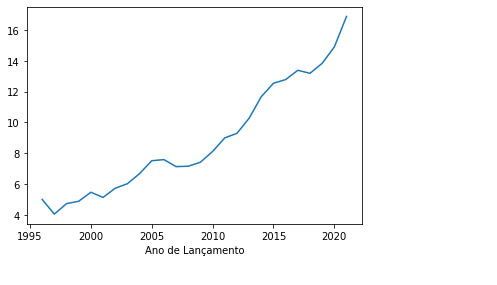

In [66]:
plot_df = df_merge_group.groupby(['Ano de Lançamento']).result_renda_div_pub.mean().plot(kind='line')
plot_df.plot()
plot_df.annotate('Ticket Medio (Renda/Publico)', color = 'black', xy=(2021, 0.02), xytext=(2021,0.05))


# 4 - Modelagem ML

Foram utilizados alguns algoritmos de regressão, os quais auxiliam na previsão de um valor numérico específico, neste caso a variável alvo público.

Para a criação dos modelos de Machine Learning irei testar os algoritmos: Ridge, Randomforestregressor, knn regressor, XGBoost Regressor.



##4.1 - Mapa de Calor - Correlação entre atributos

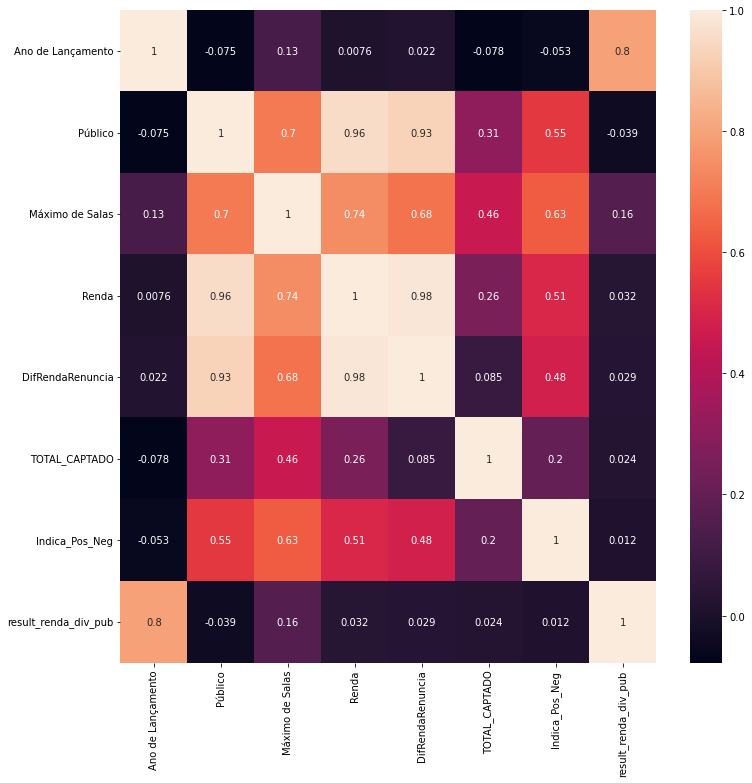

In [67]:
figura = plt.figure(figsize=(12,12))
sns.heatmap(df_merge_group.corr(), annot=True);

##4.2 - `Conversão de tipos e separação entre bases`

In [68]:
df_merge_group = df_merge_group.apply(lambda x: x.astype('category') if x.dtypes == 'object' or 'codigo' in x.name else x)

In [69]:
df_merge_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Ano de Lançamento     1039 non-null   int64   
 1   CPB                   1039 non-null   category
 2   Título                1039 non-null   category
 3   Direção               1039 non-null   category
 4   Gênero                1039 non-null   category
 5   Distribuidora         1039 non-null   category
 6   Público               1039 non-null   int64   
 7   Máximo de Salas       1039 non-null   int64   
 8   Renda                 1039 non-null   float64 
 9   DifRendaRenuncia      1039 non-null   float64 
 10  TOTAL_CAPTADO         1039 non-null   float64 
 11  Indica_Pos_Neg        1039 non-null   int64   
 12  result_renda_div_pub  1039 non-null   float64 
dtypes: category(5), float64(4), int64(4)
memory usage: 182.0 KB


In [70]:
X = df_merge_group.drop(columns=['Público',	'CPB',	'Título', 'DifRendaRenuncia','result_renda_div_pub','Indica_Pos_Neg'])
y = df_merge_group['Público']


In [71]:
X = X.apply(lambda x: x.cat.codes if x.dtypes == 'category' else x)

In [72]:
X

,Ano de Lançamento,Direção,Gênero,Distribuidora,Máximo de Salas,Renda,TOTAL_CAPTADO
0,1996,494,2,147,91,350000.000,745979.200
1,1996,362,2,147,91,8500.000,358100.600
2,1997,65,1,147,2,21386.000,297251.500
3,1997,297,2,130,17,114351.000,1855525.561
4,1997,622,2,149,15,492560.000,1545506.000
...,...,...,...,...,...,...,...
1034,2021,19,2,47,7,1130.000,3750000.000
1035,2021,552,1,139,2,3915.820,525000.000
1036,2021,604,1,57,25,206482.020,707772.320
1037,2021,107,1,36,8,13242.060,537779.980


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("Base de treinamento:{0}".format(X_train.shape))
print("Base de teste:{0}".format(X_test.shape))

Base de treinamento:(779, 7)
Base de teste:(260, 7)


In [74]:
scaler = StandardScaler() #A padronização é uma técnica de dimensionamento em que torna os dados livres de escala, convertendo a distribuição estatística dos dados no formato 0 (média) e 1 (desvio padrão)

In [75]:
X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [76]:
X_train

array([[ 0.10182183, -1.41081861,  0.66942195, ...,  0.07428073,
         0.08363695,  2.81094916],
       [-0.42116194,  1.57636264,  0.66942195, ...,  2.16218185,
         3.28517036,  0.34950504],
       [ 0.27614975,  0.06715957,  0.66942195, ...,  0.56734193,
         0.38159604,  0.90535528],
       ...,
       [ 0.97346144,  1.51911701,  0.66942195, ...,  0.46994712,
        -0.23535371,  1.48649817],
       [ 0.27614975,  1.44625893, -1.21999725, ..., -0.52226245,
        -0.24747702, -1.02567761],
       [ 0.6248056 ,  0.97788556,  0.66942195, ...,  0.04993203,
        -0.22910122, -0.79875829]])

##4.3 - Algoritmos

###Ridge (Regressão linear com regularização L2)
Força uma redução do valor dos coeficientes, penalizando coeficientes grandes que não contribuem significativamente para a explicação da variância do sinal.

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge

In [77]:
ridge = Ridge().fit(X_train, y_train)
print("Ridge alpha=1")
print("R2 na base de treinamento: {:.2f}".format(ridge.score(X_train, y_train)))
print("R2 na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("R2 na base de treinamento: {:.2f}".format(ridge10.score(X_train, y_train)))
print("R2 na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge alpha=0.1")
print("R2 na base de treinamento: {:.2f}".format(ridge01.score(X_train, y_train)))
print("R2 na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))


Ridge alpha=1
R2 na base de treinamento: 0.93
R2 na base de teste: 0.87
Ridge alpha=10
R2 na base de treinamento: 0.93
R2 na base de teste: 0.87
Ridge alpha=0.1
R2 na base de treinamento: 0.93
R2 na base de teste: 0.86


In [78]:
x_scaler = StandardScaler()

In [79]:
pipe_l = Pipeline([                 #O objetivo do pipeline é reunir várias etapas que podem ser validadas de forma cruzada ao definir parâmetros diferentes
        ('scaler', x_scaler),
        ('regressor', Ridge())
        ])

In [80]:
regr = pipe_l

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

**cross validation

In [81]:
scores = cross_val_score(regr,X_train, y_train, cv=5) #cv - Determina a estratégia de divisão de validação cruzada
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True) #n_splits é o nr de iterações; shuffle indica se deve embaralhar os dados antes de dividir em lotes
kf_cv_scores = cross_val_score(regr,X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

Mean cross-validation score: 0.91
K-fold CV average score: 0.87


**

In [82]:
#print('R2 score: {0:.2f}'.format(sklearn.metrics.r2_score(y_test, y_pred))) #coeficiente de determinação usado para avaliar o desempenho de um modelo de regressão linear
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(y_test, y_pred)) #erro absoluto médio (MAE) é uma medida de erros entre observações pareadas que expressam o mesmo fenômeno 
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(y_test, y_pred))  #MSE diferença quadrática média entre os valores estimados e o valor real
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))) # RMSE é a raiz quadrada do erro Mean Squared


print("Scaler Mean:",x_scaler.mean_)
print("Scaler Var:", x_scaler.var_)
print("Estimator Coefficient:",regr.steps[1][1].coef_)

Mean Absolute Error: 115064.87995804453
Mean Squared Error: 73103670945.2326
Root Mean Squared Error: 270376.9053473921
Scaler Mean: [-1.12464595e-14  2.05227363e-17 -5.35871447e-17 -9.12121612e-18
 -2.73636484e-17  1.36818242e-17 -7.75303370e-17]
Scaler Var: [1. 1. 1. 1. 1. 1. 1.]
Estimator Coefficient: [-6.38106188e+04 -2.63030368e+03 -7.62462931e+01 -3.10763484e+03
 -3.30623773e+04  8.62293279e+05  6.27416138e+04]


###Random Forest Regressor

Random Forest  é uma generalização da operação Árvore de Decisão, em que se utiliza um conjunto de árvores de decisão (aleatórias) a fim de minimizar o sobreajuste (overfitting) de cada modelo individual de árvore gerado para os dados de entrada.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforestregressor#sklearn.ensemble.RandomForestRegressor

https://www.kaggle.com/code/nsrose7224/random-forest-regressor-accuracy-0-91

#### Normatizando o dados para estar entre -1 e 1


In [83]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Estabelecendo o modelo

In [84]:
model = RandomForestRegressor(n_jobs=-1, random_state=131) #O número de jobs a serem executados em paralelo.  -1 significa usar todos os processadores.


#### Experimentando diferentes números de estimadores

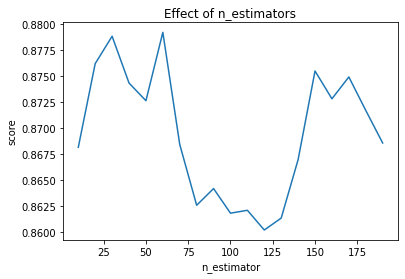

In [85]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [86]:
scores

[0.8681803264404162,
 0.8762267337582614,
 0.8788572609718321,
 0.87435970815842,
 0.8726607390036119,
 0.8792338149547226,
 0.8684523002646417,
 0.8626091907394554,
 0.8642155879539333,
 0.861848100573978,
 0.8621261235636443,
 0.8602296987783468,
 0.8613761564020904,
 0.8669952085555354,
 0.8755166826342693,
 0.8728453566152743,
 0.8749451509105817,
 0.8717323927929199,
 0.8685965006922346]

**cross validation

In [87]:
scores = cross_val_score(model,X_train, y_train, cv=5) #cv - Determina a estratégia de divisão de validação cruzada
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True) #n_splits é o nr de iterações; shuffle indica se deve embaralhar os dados antes de dividir em lotes
kf_cv_scores = cross_val_score(model,X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

Mean cross-validation score: 0.92
K-fold CV average score: 0.92


In [88]:
prediction = model.predict(X_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
# Print results
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', np.sqrt(mse)) # RMSE é a raiz quadrada do erro Mean Squared


Mean Squared Error: 71274648854.42839
Mean Absolute Error: 77684.37520242915
Root Mean Squared Error: 266973.12384288496


###knn regressor
Regressão baseada em k vizinhos mais próximos.
O alvo é previsto pela interpolação local dos alvos associados aos vizinhos mais próximos no conjunto de treinamento.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://www.datatechnotes.com/2019/04/regression-example-with-k-nearest.html


In [89]:
#from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=8)  #Número de vizinhos a serem usados ​​por padrão para consultas de vizinhos
print(model)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',  
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform') 
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)


KNeighborsRegressor(n_neighbors=8)

In [90]:
pred_y = model.predict(X_test)

In [91]:
#pred_y = model.predict(X_train)

In [92]:
score=model.score(X_test, y_test)
print("R2 na base de teste: {:.2f}".format(score))

R2 na base de teste: 0.92


In [93]:
#score=model.score(X_train, y_train)
#print(score)

**cross validation

In [94]:
scores = cross_val_score(model,X_train, y_train, cv=5) #cv - Determina a estratégia de divisão de validação cruzada
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True) #n_splits é o nr de iterações; shuffle indica se deve embaralhar os dados antes de dividir em lotes
kf_cv_scores = cross_val_score(model,X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

Mean cross-validation score: 0.78
K-fold CV average score: 0.75


In [95]:
mse =mean_squared_error(y_test, pred_y)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 43401355858.299576
Root Mean Squared Error: 208329.92069863508


In [96]:
#from sklearn.metrics import mean_absolute_error
print("MAE: %.3f" % mean_absolute_error(y_test, pred_y))

MAE: 78230.593


###Regressão Linear

Regressão linear é um algoritmo supervisionado de machine learning usado para estimar o valor de algo baseado em uma série de outros dados históricos, portanto olhando para o passado você pode “prever” o futuro.

Regressão linear simples : refere-se quando temos somente uma variável independente (X) para fazermos a predição.

Regressão linear múltipla: refere-se a várias variáveis independentes (X)usadas para fazer a predição.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression

In [97]:
X_train.shape, X_test.shape

((779, 7), (260, 7))

In [98]:
regressor_multiplo_filme = LinearRegression()
regressor_multiplo_filme.fit(X_train, y_train)

LinearRegression()

In [99]:
regressor_multiplo_filme.intercept_ #O Intercepto representa o valor de b0 da equação da regressão linear. É a previsão do modelo quando o valor de X é zero.

254241.67522464698

In [100]:
regressor_multiplo_filme.coef_    # os coeficientes representam os “pesos” das variáveis nos modelos, neste caso, na equação os identificamos como os b1, b2, b3…bn. 

array([-6.35923420e+04, -2.63367641e+03, -2.26824735e+01, -3.05432897e+03,
       -3.54047447e+04,  8.65036956e+05,  6.31957343e+04])

In [101]:
len(regressor_multiplo_filme.coef_)

7

In [102]:
print("R2 na base de treinamento: {:.2f}".format (regressor_multiplo_filme.score(X_train, y_train)))

R2 na base de treinamento: 0.93


In [103]:
print("R2 na base de teste: {:.2f}".format (regressor_multiplo_filme.score(X_test, y_test)))

R2 na base de teste: 0.86


**cross validation

In [104]:
scores = cross_val_score(regressor_multiplo_filme,X_train, y_train, cv=5) #cv - Determina a estratégia de divisão de validação cruzada
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True) #n_splits é o nr de iterações; shuffle indica se deve embaralhar os dados antes de dividir em lotes
kf_cv_scores = cross_val_score(regressor_multiplo_filme,X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

Mean cross-validation score: 0.91
K-fold CV average score: 0.89


**

In [105]:
previsoes = regressor_multiplo_filme.predict(X_test)
previsoes

array([-9.52372152e+03,  4.65934846e+05, -4.08423044e+04,  4.92057498e+04,
        2.33117803e+04, -1.00862768e+05, -6.11798686e+04, -1.49628742e+05,
        1.03468858e+06,  2.48244443e+04,  2.88242341e+04, -1.03676737e+05,
        2.28509602e+03, -4.12521306e+04,  1.90314399e+04, -2.46640495e+04,
       -9.80071514e+04,  3.82394039e+03, -7.45438869e+04, -6.42475730e+04,
        1.01108661e+05,  5.27345651e+05, -4.17308399e+04,  7.12159996e+04,
        1.23082802e+05, -7.12950677e+04, -1.55144551e+05, -1.62363369e+05,
       -5.67765846e+04,  5.88959992e+05,  1.95390521e+04, -1.70702658e+05,
        8.69792499e+04, -5.95243447e+04, -1.22245930e+05,  2.72150566e+01,
        3.65980838e+06, -3.30112701e+04,  2.29872382e+06, -5.00569520e+04,
        1.21270028e+05,  8.81619116e+05, -5.26470816e+04, -6.26258248e+04,
        4.55440593e+04,  1.38522755e+02,  1.94604395e+05,  1.58977603e+05,
        9.47342834e+04,  2.43361742e+04, -1.29887813e+05,  5.92983070e+04,
        1.40427514e+04,  

In [106]:
y_test

631     16627
679    377670
364       233
319      2822
487     95826
        ...  
695     11856
941    803483
158    774318
40      41479
358    219472
Name: Público, Length: 260, dtype: int64

In [107]:
print('R2 na base de teste score: {0:.2f}'.format(sklearn.metrics.r2_score(y_test, previsoes))) #coeficiente de determinação usado para avaliar o desempenho de um modelo de regressão linear

R2 na base de teste score: 0.86


In [108]:
mse =mean_squared_error(y_test, previsoes)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 73424221868.39874
Root Mean Squared Error: 270969.04226940527


In [109]:
#from sklearn.metrics import mean_absolute_error
print ("MAE: %.3f" % mean_absolute_error(y_test, previsoes))
#mean_absolute_error(y_test, previsoes)

MAE: 115065.071


### XGBoost Regressor

XGBoost é uma implementação do algoritmo de árvores de aumento de gradiente. O XGBoost é um modelo de aprendizado de máquina supervisionado popular com características como velocidade de computação, paralelização e desempenho.
https://machinelearningmastery.com/xgboost-for-regression/

https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html


In [110]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

In [111]:
xgbr = xgb.XGBRegressor(verbosity=0) #Verbosidade da impressão de mensagens. Os valores válidos são 0 (silencioso), 1 (aviso), 2 (informações), 3 (depuração)
print(xgbr)

xgbr.fit(X_train, y_train)
 
#score = xgbr.score(X_train, y_train)   
#print("Training score: ", score) 

score = xgbr.score(X_test, y_test)   
print("R2 na base de teste: {:.2f}".format (score))    

XGBRegressor(verbosity=0)
R2 na base de teste: 0.72


Mean cross-validation score: 0.95
K-fold CV average score: 0.93
MSE: 152074872913.593
RMSE: 389967.784
MAE: 82918.298


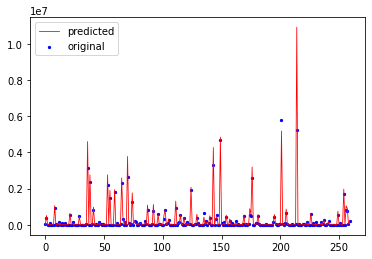

In [112]:
# - cross validation 
# Validação cruzada é uma técnica para avaliar modelos de ML por meio de treinamento de vários modelos de ML em subconjuntos de dados de entrada disponíveis
# e avaliação deles no subconjunto complementar dos dados.
# Na validação cruzada k-fold, você divide os dados de entrada em subconjuntos de dados k (também chamados de folds). 
#  treina um modelo de ML em todos, menos em um (k-1) dos conjuntos de dados e, em seguida, avalia o modelo no conjunto de dados que não foi usado para treinamento.
# Esse processo é repetido k vezes, com um subconjunto diferente reservado para avaliação (e excluído do treinamento) a cada vez.

scores = cross_val_score(xgbr,X_train, y_train, cv=5) #cv - Determina a estratégia de divisão de validação cruzada
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True) #n_splits é o nr de iterações; shuffle indica se deve embaralhar os dados antes de dividir em lotes
kf_cv_scores = cross_val_score(xgbr,X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
mae = mean_absolute_error(y_test, ypred)
print("MSE: %.3f" % mse)
print("RMSE: %.3f" % (mse**(1/2.0)))
print ("MAE: %.3f" % mae)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

